In [14]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
data = np.load('sdss_galaxy_colors.npy')

# Split data into features and targets
features = np.zeros((data.shape[0], 4))
features[:, 0] = data['u'] - data['g']
features[:, 1] = data['g'] - data['r']
features[:, 2] = data['r'] - data['i']
features[:, 3] = data['i'] - data['z']

targets = data['redshift']

In [3]:
# Split data into training and testing
split = 2 * features.shape[0] // 3
trainFeatures = features[:split]
testFeatures = features[split:]

trainTargets = targets[:split]
testTargets = targets[split:]

In [4]:
# Create and train regression model
model = DecisionTreeRegressor()
model.fit(trainFeatures, trainTargets)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Text(0.5,1,'Value of residuals')

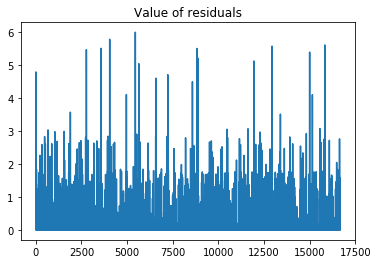

In [21]:
# Generate predictions and create residuals plot
predictions = model.predict(testFeatures)
residuals = abs(predictions - testTargets)
plt.plot(residuals)
plt.title('Value of residuals')

Since our plot 

0.0938938700383
